# PPAC Analysis Notebook

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Load Data

In [2]:
data_paths = {
    "coincident": Path("analysis_output/coincident_imp.pkl"),
    "decay_candidates": Path("analysis_output/decay_candidates.pkl"),
    "final_correlated": Path("analysis_output/final_correlated.pkl"),
}
data = {}
for name, path in data_paths.items():
    if path.exists():
        data[name] = pd.read_pickle(path)
        print(f"Loaded {name}: {len(data[name])} rows")
    else:
        print(f"File {path} not found")

Loaded coincident: 75671 rows
Loaded decay_candidates: 11442 rows
Loaded final_correlated: 416 rows


## Basic Inspection

In [3]:
for name, df in data.items():
    display(df.head())

,imp_timetag,imp_x,imp_y,imp_tagx,imp_tagy,imp_nfile,imp_tdelta,imp_nX,imp_nY,imp_xE,...,dt_anodeH_ps,dt_cathode_ns,dt_anodeV_ns,dt_anodeH_ns,dt_cathode_us,dt_anodeV_us,dt_anodeH_us,dt_anodeH_us_corr,dt_anodeV_us_corr,dt_cathode_us_corr
0,101288283747,136,46,101288283747,101288174743,0,109004.0,1,1,1095.016357,...,-1509973.0,-1504.195,-1513.629,-1509.973,-1.504195,-1.513629,-1.509973,-1.509973,-1.513629,-1.504195
1,400865502745,39,50,400865502745,400865446996,0,55749.0,1,1,1059.421387,...,-1463306.0,-1456.144,-1461.025,-1463.306,-1.456144,-1.461025,-1.463306,-1.463306,-1.461025,-1.456144
2,573817930247,118,15,573817930247,573817837118,0,93129.0,1,1,1461.149048,...,-1529079.0,-1523.158,-1529.287,-1529.079,-1.523158,-1.529287,-1.529079,-1.529079,-1.529287,-1.523158
3,1067899768495,70,5,1067899768495,1067899744007,0,24488.0,1,1,694.938171,...,-1515127.0,-1507.738,-1514.752,-1515.127,-1.507738,-1.514752,-1.515127,-1.515127,-1.514752,-1.507738
4,1323801357064,116,38,1323801357064,1323801252547,0,104517.0,1,1,27699.201172,...,-1452539.0,-1447.663,-1453.996,-1452.539,-1.447663,-1.453996,-1.452539,-1.452539,-1.453996,-1.447663


,t,x,y,tagx,tagy,nfile,xboard,yboard,tdelta,nX,nY,xE,yE,event_type,recoil_index,recoil_time_sec,ppac_flag,is_clean,log_dt
0,12.745654,116,38,12745654242999,12745654131995,0,1,7,111004.0,1,1,464.951569,456.632172,imp,4,1.323801,both,False,2.435528
1,16.457094,51,16,16457094180996,16457094035992,0,4,7,145004.0,1,1,349.606598,349.284485,imp,6,1.629444,both,False,2.696494
2,8.701934,50,8,8701933921999,8701933896002,0,5,7,25997.0,1,1,339.895233,379.164886,imp,18,2.312056,both,False,1.854715
3,11.881398,150,40,11881397706994,11881397608997,0,1,7,97997.0,1,1,347.061829,379.609589,imp,20,2.952890,both,False,2.189249
4,8.553107,114,5,8553107104005,8553106971995,0,3,6,132010.0,1,1,361.604065,388.738892,imp,33,5.164285,both,False,1.220482


,recoil_x,recoil_y,recoil_xE,timetag,recoil_t,alpha_x,alpha_y,alpha_t,alpha_xE,alpha_dt,chain,electron_x,electron_y,electron_t,electron_xE,electron_dt
0,26.0,39.0,5860.605469,7.302970e+13,73.029697,26.0,39.0,74.879222,8222.533203,1.849525,RA,NaN,NaN,NaN,NaN,NaN
1,38.0,44.0,4808.135254,8.965134e+13,89.651343,38.0,44.0,90.497539,8137.016113,0.846196,RA,NaN,NaN,NaN,NaN,NaN
2,111.0,29.0,3997.684082,1.248798e+14,124.879794,111.0,29.0,127.958630,8251.816406,3.078836,RA,NaN,NaN,NaN,NaN,NaN
3,68.0,5.0,6452.367188,1.284410e+14,128.440969,68.0,5.0,137.135919,8243.870117,8.694950,RA,NaN,NaN,NaN,NaN,NaN
4,42.0,38.0,6794.982910,1.328055e+14,132.805482,42.0,38.0,133.313683,8223.149414,0.508201,RA,NaN,NaN,NaN,NaN,NaN


## REA
Plot a histogram of recoil energies from the coincident events.

,recoil_x,recoil_y,recoil_xE,timetag,recoil_t,alpha_x,alpha_y,alpha_t,alpha_xE,alpha_dt,chain,electron_x,electron_y,electron_t,electron_xE,electron_dt
407,50.0,48.0,5490.928711,1.545785e+15,1545.785115,50.0,48.0,1549.641867,8205.927734,1.731084,REA,50.0,48.0,1547.910783,603.144104,2.125668
408,66.0,50.0,6865.623047,2.056732e+15,2056.731648,66.0,50.0,2060.357126,8262.849609,3.352916,REA,66.0,50.0,2057.004210,382.812195,0.272561
409,95.0,48.0,6631.552246,2.168259e+15,2168.258740,95.0,48.0,2171.307092,8262.400391,0.928668,REA,95.0,48.0,2170.378424,379.965820,2.119685
410,131.0,35.0,4857.732910,5.162223e+15,5162.222742,131.0,35.0,5167.089910,8282.479492,0.912240,REA,131.0,35.0,5166.177670,407.361664,3.954928
411,53.0,15.0,7033.510742,5.363413e+15,5363.413231,53.0,15.0,5367.426728,8273.238281,3.602669,REA,53.0,15.0,5363.824058,290.991974,0.410828
412,21.0,49.0,6083.557617,7.795087e+15,7795.087033,21.0,49.0,7796.093374,8191.303711,0.788305,REA,21.0,49.0,7795.305069,455.072327,0.218036
413,79.0,19.0,4307.506836,7.870899e+15,7870.898637,79.0,19.0,7871.520464,8218.794922,0.433524,REA,79.0,19.0,7871.086940,604.265625,0.188303
414,57.0,23.0,5856.755859,8.564611e+15,8564.611040,57.0,23.0,8567.657676,8227.053711,2.816817,REA,57.0,23.0,8564.840859,316.849274,0.229819
415,44.0,16.0,5241.960449,1.012487e+16,10124.873108,44.0,16.0,10128.815040,8251.633789,2.612702,REA,44.0,16.0,10126.202339,336.506531,1.329230


9


Text(0, 0.5, 'Counts/ 10keV')

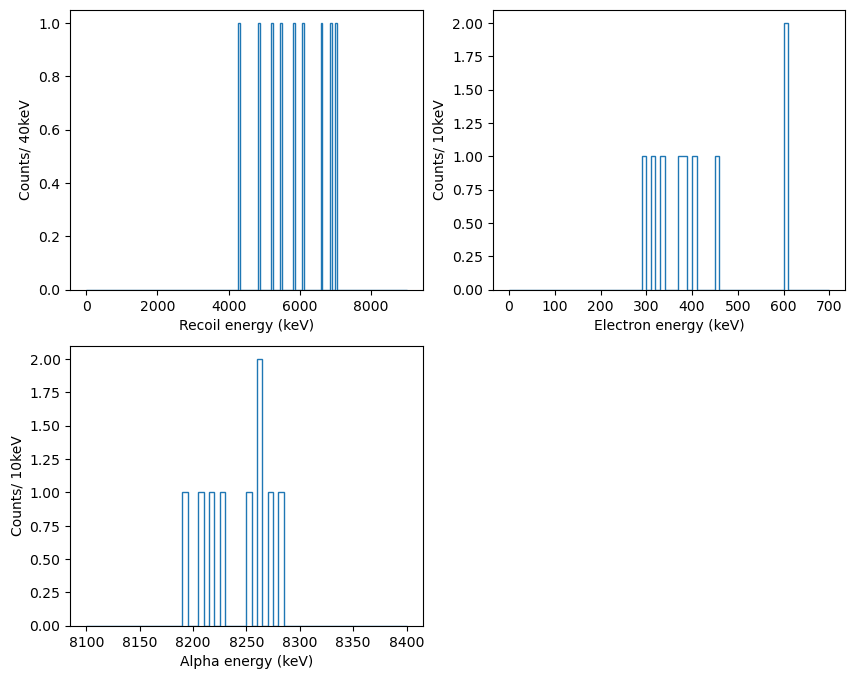

In [36]:
df = data["final_correlated"]

df_REA = df[df["chain"] == "REA"]
display(df_REA)
print(len(df_REA))
plt.figure(figsize=(10,8))

plt.subplot(221)
plt.hist(df_REA['recoil_xE'], histtype='step',bins=175, range=(0,9000))
plt.xlabel('Recoil energy (keV)')
plt.ylabel(r'Counts/ 40keV')

plt.subplot(222)
plt.hist(df_REA['electron_xE'], histtype='step',bins=70, range=(0,700))
plt.xlabel('Electron energy (keV)')
plt.ylabel(r'Counts/ 10keV')

plt.subplot(223)
plt.hist(df_REA['alpha_xE'], histtype='step', bins=60, range=(8100,8400))
plt.xlabel('Alpha energy (keV)')
plt.ylabel(r'Counts/ 10keV')


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 2., 1., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
         -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
         -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
         -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
         -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
         -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
          0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
          2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3

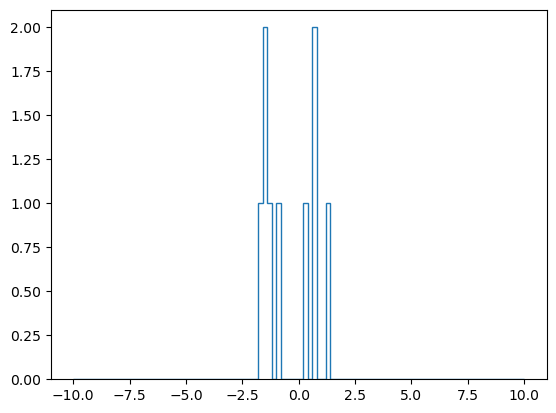

In [38]:

plt.hist(np.log(np.abs(df_REA['electron_t']-df_REA[r'recoil_t'])), histtype='step', bins =100, range=(-10,10))

,recoil_x,recoil_y,recoil_xE,timetag,recoil_t,alpha_x,alpha_y,alpha_t,alpha_xE,alpha_dt,chain,electron_x,electron_y,electron_t,electron_xE,electron_dt
0,26.0,39.0,5860.605469,7.302970e+13,73.029697,26.0,39.0,74.879222,8222.533203,1.849525,RA,NaN,NaN,NaN,NaN,NaN
1,38.0,44.0,4808.135254,8.965134e+13,89.651343,38.0,44.0,90.497539,8137.016113,0.846196,RA,NaN,NaN,NaN,NaN,NaN
2,111.0,29.0,3997.684082,1.248798e+14,124.879794,111.0,29.0,127.958630,8251.816406,3.078836,RA,NaN,NaN,NaN,NaN,NaN
3,68.0,5.0,6452.367188,1.284410e+14,128.440969,68.0,5.0,137.135919,8243.870117,8.694950,RA,NaN,NaN,NaN,NaN,NaN
4,42.0,38.0,6794.982910,1.328055e+14,132.805482,42.0,38.0,133.313683,8223.149414,0.508201,RA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,128.0,20.0,7902.222168,1.107276e+16,11072.757406,128.0,20.0,11073.929305,8251.258789,1.171900,RA,NaN,NaN,NaN,NaN,NaN
403,70.0,17.0,6163.878906,1.108687e+16,11086.866188,70.0,17.0,11089.941283,8251.657227,3.075096,RA,NaN,NaN,NaN,NaN,NaN
404,61.0,33.0,3370.176270,1.109124e+16,11091.240049,61.0,33.0,11094.499532,8121.182129,3.259483,RA,NaN,NaN,NaN,NaN,NaN
405,85.0,50.0,4897.977051,1.110810e+16,11108.103502,85.0,50.0,11111.011793,8262.209961,2.908291,RA,NaN,NaN,NaN,NaN,NaN


407


Text(0, 0.5, 'Counts/ 10keV')

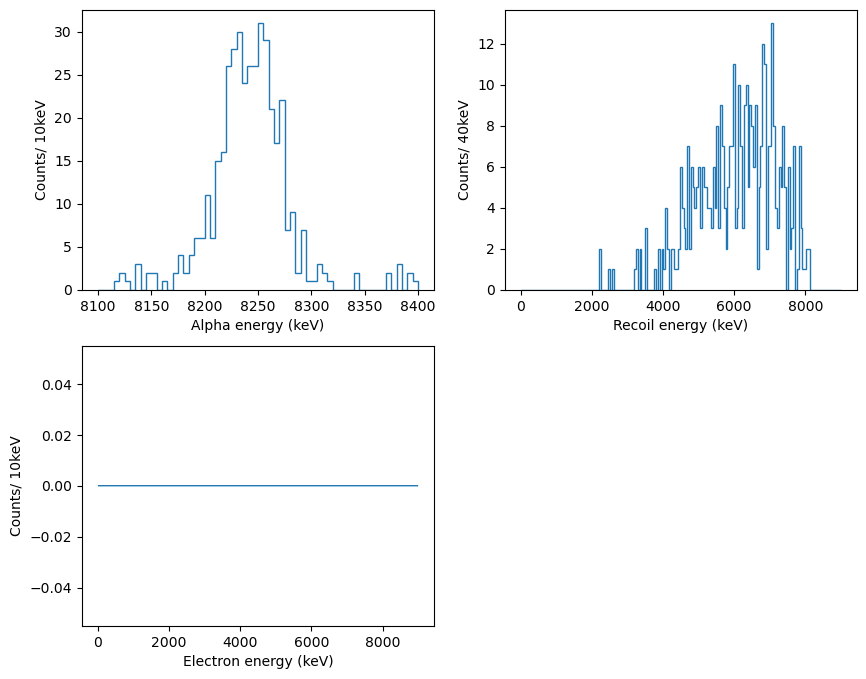

In [33]:
df = data["final_correlated"]

df_RA = df[df["chain"] == "RA"]
display(df_RA)
print(len(df_RA))
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(df_RA['alpha_xE'], histtype='step', bins=60, range=(8100,8400))
plt.xlabel('Alpha energy (keV)')
plt.ylabel(r'Counts/ 10keV')

plt.subplot(222)
plt.hist(df_RA['recoil_xE'], histtype='step',bins=175, range=(0,9000))
plt.xlabel('Recoil energy (keV)')
plt.ylabel(r'Counts/ 40keV')

plt.subplot(223)
plt.hist(df_RA['electron_xE'], histtype='step',bins=900, range=(0,9000))
plt.xlabel('Electron energy (keV)')
plt.ylabel(r'Counts/ 10keV')